In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect 

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date=session.query(func.max(Measurement.date)).first()
recent_date=recent_date[0]
recent_date

'2017-08-23'

In [11]:
#Get column information and type

inspector = inspect(engine) 
inspector.get_table_names()
columns=inspector.get_columns('measurement')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [12]:
#Get
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Calculate the date one year from the last date in data set.
year_ago=dt.date(2017,8, 23)- dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [14]:
# Starting from the most recednt data point in the database.
session.query(Measurement.date).filter(Measurement.date>='2016-08-23').all()
# session.query(FROM.SELECT,FROM.SELECT,FROM.SELECT)

session.query(Measurement.prcp).filter(Measurement.date>='2016-08-23').all()

[(0.0,),
 (0.08,),
 (0.08,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.13,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (None,),
 (None,),
 (0.05,),
 (0.0,),
 (0.03,),
 (0.0,),
 (0.05,),
 (0.0,),
 (0.02,),
 (1.32,),
 (0.42,),
 (0.06,),
 (0.05,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.06,),
 (0.02,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.05,),
 (0.15,),
 (0.01,),
 (0.0,),
 (0.03,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.24,),
 (0.03,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.07,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.0,),
 (0.03,),
 (0.05,),
 (0.01,),
 (0.13,),
 (0.14,),
 (0.05,),
 (0.05,),
 (0.05,),
 (0.0,),
 (0.01,),
 (0.0,),
 (0.14,),
 (0.12,),
 (0.03,),
 (0.0,),
 (0.03,),
 (0.43,),
 (0.02,),
 (0.0

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Perform a query to retrieve the data and precipitation scores
year_results= session.query(Measurement.prcp,Measurement.date).filter(Measurement.date>='2016-08-23').all()
year_results

[(0.0, '2016-08-23'),
 (0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-1

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_results=pd.DataFrame(year_results, columns=['prcp','date'])
year_results.set_index('date')

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


Text(0.5, 1.0, 'Year Precipitation Chart')

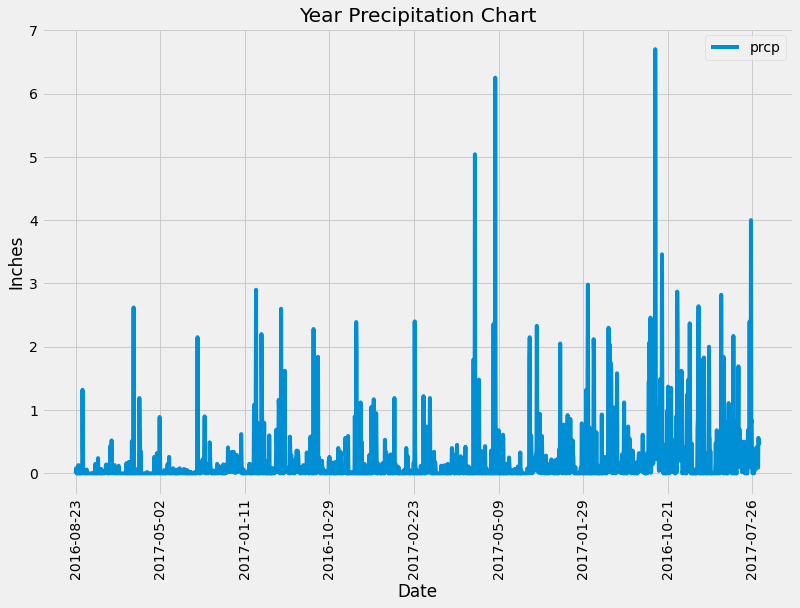

In [20]:

# Sort the dataframe by date

year_results= year_results.dropna()
year_results.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
year_results.plot(x="date",y="prcp", figsize=(12,8))
plt.xlabel("Date")
plt.ylabel('Inches')
plt.xticks(rotation='90')
plt.title('Year Precipitation Chart')

In [76]:
# Use Pandas to calcualte the summary statistics for the precipitation data

year_results.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [87]:
# Design a query to calculate the total number stations in the dataset
stations=session.query(Station.name).count()
stations

9

In [86]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [90]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#'USC00519281', 2772 count
low_high_av= session.query(func.max(Measurement.tobs),func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station=='USC00519281').all()
low_high_av

[(85.0, 54.0, 71.66378066378067)]

In [93]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp_results=session.query(Measurement.date,Measurement.tobs).filter(Measurement.date>='2016-08-23').filter\
(Measurement.station=='USC00519281').all()
year_temp_results=pd.DataFrame(year_temp_results, columns=['date', 'tobs'])
year_temp_results.set_index('date')

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


Text(0.5, 0, 'Temperature')

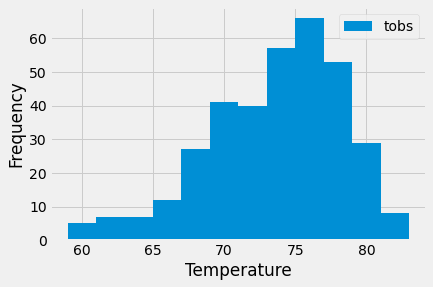

In [108]:
year_temp_results.plot.hist(bins=12)
plt.xlabel('Temperature')


# Close session

In [94]:
# Close Session
session.close()